***The Impact of Feature Scaling on Machine Learning Model Performance: A Case Study***


*Feature scaling is an essential preprocessing step in machine learning that can greatly influence the performance of your models. In many cases, the predictive power of a model hinges on whether the features are properly scaled, as certain algorithms are highly sensitive to the magnitude of input data. This article explores the effects of feature scaling using StandardScaler and MinMaxScaler, comparing their impact on model performance.*


Predictions comparison (first 10 rows):
   Without Scaling Predictions  With Standard Scaling Predictions  \
0                     175300.0                            50680.0   
1                     168060.0                           108380.0   
2                     439180.4                           317640.2   
3                     272060.0                           269260.0   
4                     241960.0                           279220.0   
5                     201720.0                           211880.0   
6                     187580.0                           229680.0   
7                      90100.0                           210020.0   
8                     263620.0                           239520.0   
9                     311880.2                           483260.6   

   With MinMax Scaling Predictions    Actual  
0                          53880.0   47700.0  
1                          67480.0   45800.0  
2                         299920.2  500001.0  
3          

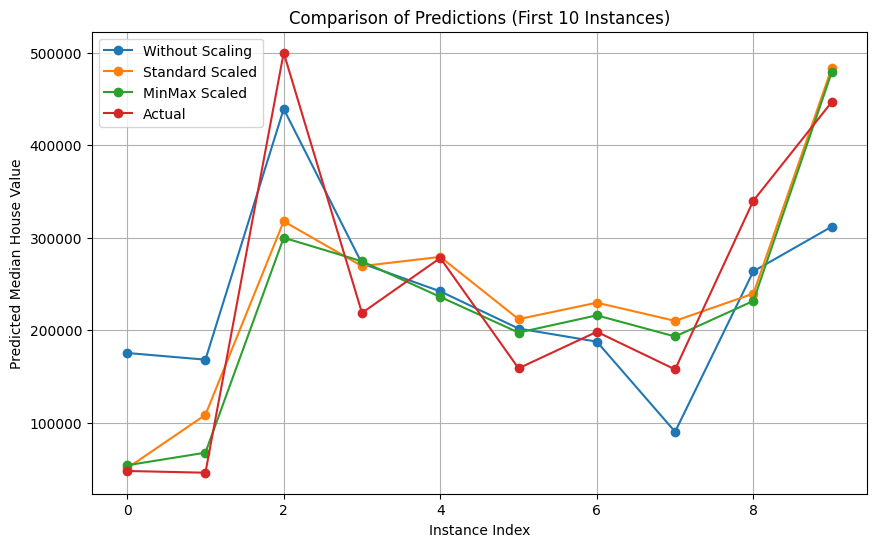


MAE comparison:
           Scenario           MAE
0   Without Scaling  78208.612112
1  Standard Scaling  41991.729167
2    MinMax Scaling  42479.918798


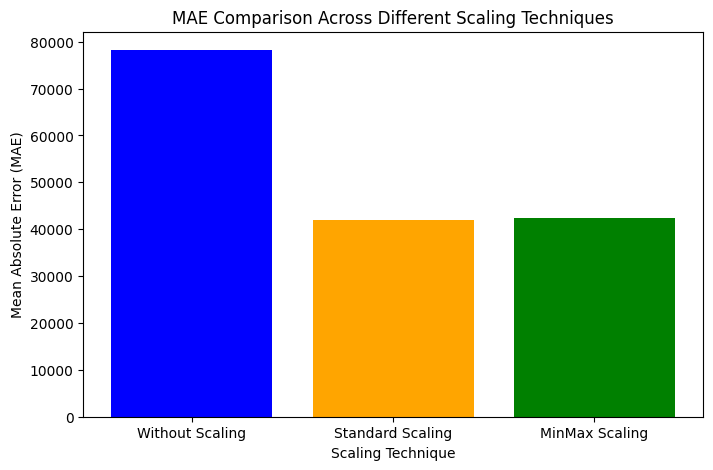

In [2]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the download location and dataset path
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to download and extract the dataset
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Download and extract the dataset
fetch_housing_data()

# Load the dataset into a pandas DataFrame
housing_path = os.path.join(HOUSING_PATH, "housing.csv")
housing = pd.read_csv(housing_path)

# Select all numerical columns except the target 'median_house_value'
X = housing.drop(columns=["ocean_proximity", "median_house_value"])
y = housing['median_house_value']

# Fill missing values in 'total_bedrooms' with the median
X['total_bedrooms'].fillna(X['total_bedrooms'].median(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scenario 1: Without Scaling
# Train KNN model without scaling
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions and calculate MSE & MAE
y_pred_no_scaling = knn.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
mae_no_scaling = mean_absolute_error(y_test, y_pred_no_scaling)

### Scenario 2: With Standard Scaling
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Train KNN model with Standard Scaling
knn_standard = KNeighborsRegressor(n_neighbors=5)
knn_standard.fit(X_train_standard, y_train)

# Make predictions and calculate MSE & MAE
y_pred_standard = knn_standard.predict(X_test_standard)
mse_standard = mean_squared_error(y_test, y_pred_standard)
mae_standard = mean_absolute_error(y_test, y_pred_standard)

### Scenario 3: With MinMax Scaling
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Train KNN model with MinMax Scaling
knn_minmax = KNeighborsRegressor(n_neighbors=5)
knn_minmax.fit(X_train_minmax, y_train)

# Make predictions and calculate MSE & MAE
y_pred_minmax = knn_minmax.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
mae_minmax = mean_absolute_error(y_test, y_pred_minmax)

# Prepare a DataFrame to compare predictions
predictions_comparison = pd.DataFrame({
    'Without Scaling Predictions': y_pred_no_scaling[:10],
    'With Standard Scaling Predictions': y_pred_standard[:10],
    'With MinMax Scaling Predictions': y_pred_minmax[:10],
    'Actual': y_test.values[:10]
})

print("\nPredictions comparison (first 10 rows):")
print(predictions_comparison)

# Visualize predictions comparison as a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictions_comparison['Without Scaling Predictions'], label='Without Scaling', marker='o')
plt.plot(predictions_comparison['With Standard Scaling Predictions'], label='Standard Scaled', marker='o')
plt.plot(predictions_comparison['With MinMax Scaling Predictions'], label='MinMax Scaled', marker='o')
plt.plot(predictions_comparison['Actual'], label='Actual', marker='o')
plt.title('Comparison of Predictions (First 10 Instances)')
plt.xlabel('Instance Index')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.grid(True)
plt.show()

# MAE Comparison Table
mae_comparison = pd.DataFrame({
    'Scenario': ['Without Scaling', 'Standard Scaling', 'MinMax Scaling'],
    'MAE': [mae_no_scaling, mae_standard, mae_minmax]
})

print("\nMAE comparison:")
print(mae_comparison)

# Visualize MAE comparison as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(mae_comparison['Scenario'], mae_comparison['MAE'], color=['blue', 'orange', 'green'])
plt.title('MAE Comparison Across Different Scaling Techniques')
plt.xlabel('Scaling Technique')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()
